# Lab Assignment 4: Comparing Anagram Solutions

One string is an anagram of another if the second is a rearrangement of the first. For example "heart" and "earth" are anagrams. What are different solutions to trying to checking if two strings (assumed to be of equal length) are anagams? We will explore four different approaches to solving this problem to illustrate the different performance and interpretability trade-offs for designing an algorithm. All four of these algorithms will produce the same solutions, but will do it in very different ways with vastly different levels of performance. Each problem will:

1. Measure the algorithm's empirical performance and fit best curve to find its complexity class
2. Break apart a completed algorithm to see how it works
3. Analyze the algorithm to identify the bottlenecks causing its complexity class

We'll do Problem 0 together, leaving you to analyze the other 3 algorithms. This first one is by far the hardest to understand, which is why we're doing it together as an example.

Part 1 is just about already done for you, you only need to eyeball the fits to see which is the best.

Part 2 will take the most time. The goal here is for you to take apart the algorithm (but not the functions it calls) and convince your peer grader that you know what each step is doing. Take a line or block from the algorithm, work from the inside of a loop outwards, pass in example code and test cases, etc. and convince your peer grader that you know how all the pieces are working together. 

Part 3 will ask you to identify which parts you suspect are causing the biggest bottlenecks in performance.


# Setup functions and importing libraries

Import helper libraries and functions we'll need.

In [2]:
# Setup plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Import string to get access to the ascii_lowercase attribute
import string

# Import random to be able to randomly sample and shuffle a list/string
import random

# Import numpy to help with randomizing things
import numpy as np

# Import timeit to help with timing the algorithms
import timeit

# Perform curve-fitting
from scipy.optimize import curve_fit

# And use scipy's own factorial method
from scipy.special import factorial

# Generate permutations
from itertools import permutations

Define some basic functional forms we'll need for curve fitting.

In [3]:
# Define some basic functions we'll use throughout
def constantN(x,a=1,b=0):
    return a

def logN(x,a=1,b=0):
    return a*np.log10(x)+b

def linearN(x,a=1,b=0):
    return a*x+b

def NlogN(x,a=1,b=0):
    return a*x*np.log10(x)+b

def N2(x,a=1,b=0):
    return a*x**2+b

def twoN(x,a=1,b=0):
    return a*2**x+b

def factN(x,a=1,b=0):
    return a*factorial(x)+b

Create some functions that make random words of some length and can shuffle them.

In [4]:
def make_a_random_word(length):
    random_letters = np.random.choice(list(string.ascii_lowercase),size=length)
    word = ''.join(random_letters)
    return word

def shuffle_a_word(word):
    listified_word = list(word)
    random.shuffle(listified_word)
    shuffled_word = ''.join(listified_word)
    return shuffled_word

random_word = make_a_random_word(6)
shuffled_word = shuffle_a_word(random_word)

print("The random word is '{0}' and the shuffled version of the random word is '{1}'.".format(random_word,shuffled_word))

The random word is 'fdytoa' and the shuffled version of the random word is 'ofytad'.


In [11]:
shuffle_a_word(make_a_random_word(10))

'kteotvjifk'

We'll also need a mergesort function because it has nice $O(N\ log\ N)$ properties.

In [35]:
# http://stackoverflow.com/a/18783542/1574687
def mergesort(x):
    result = []
    if len(x) < 20:
        return sorted(x)
    mid = int(len(x) / 2)
    y = mergesort(x[:mid])
    z = mergesort(x[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
        if y[i] > z[j]:
            result.append(z[j])
            j += 1
        else:
            result.append(y[i])
            i += 1
    result += y[i:]
    result += z[j:]
    return result

mergesort(list('heart'))

['a', 'e', 'h', 'r', 't']

# An aside on working with lists

We can modify what's in a list by accessing its position and assigning a new value. We'll be doing this a *lot* in the coming weeks.

In [12]:
test_range = list(range(5))
test_range

[0, 1, 2, 3, 4]

You can access a specific position in a list.

In [13]:
test_range[3]

3

You can also modify a list by reassigning a value to a position in the list.

In [14]:
test_range[3] = 100
test_range

[0, 1, 2, 100, 4]

Interestingly, you can assign or replace almost anything into a Python list.

In [15]:
test_range[0] = np.pi # A float constant
test_range[1] = [1,10,100] # Another list
test_range[2] = {'a':1} # A dictionary
test_range[3] = ('Boulder','Colorado') # A tuple
test_range[4] = None # A None object
test_range

[3.141592653589793, [1, 10, 100], {'a': 1}, ('Boulder', 'Colorado'), None]

But note that lists have a defined size and if you try to do something outside of its range, you'll get an `IndexError`.

In [16]:
test_range[5] = 'One more thing'
test_range

IndexError: list assignment index out of range

We'll be talking about linear data structures like lists a lot more next week, but for now if you wanted to make this list of 5 things have a 6th thing, you have to use the append method called on the list itself.

In [17]:
test_range.append('One more thing')
test_range

[3.141592653589793,
 [1, 10, 100],
 {'a': 1},
 ('Boulder', 'Colorado'),
 None,
 'One more thing']


# Problem 0: $O(N^2)$ Solution
First, we begin with the Checking Off approach. Loop through all the characters in the first string and loop through all the characters in the second string, we check if the letter from string 1 is also a letter in string 2 and if it is, add the letter from string 2 to the "matching_letters" list, and finally check if the length of the matching string letters is the same length as the length of string 1.

In [18]:
def anagram1(s1,s2):
    # Convert s2 into a list to do item assignment
    a_list = list(s2)
    # Start the loop at position 0 in s1
    pos_s1 = 0
    # Assume it's an anagram until you find that it isn't
    is_anagram1 = True
    
    # Loop over each letter in s1 as long as we still think it's an anagram
    while pos_s1 < len(s1) and is_anagram1:
        # Start the next loop at position 0 in s2
        pos_s2 = 0
        # Assume we haven't seen an anagram until we know we have
        is_anagram2 = False
        
        # Start another loop over each letter in s2 as long as we still think it's an anagram
        while pos_s2 < len(a_list) and not is_anagram2:
            # Finally do the comparison to check if the letter from s1 is also a letter in s2
            if s1[pos_s1] == a_list[pos_s2]:
                # If it's not, we don't have an anagram
                is_anagram2 = True
            else:
                # Otherwise go to the next letter in s2 in the loop
                pos_s2 += 1
        
        # If we've gone through the entire s2 comparing to the the letter in s1
        # And we haven't disproved it being an anagram so far, 
        if is_anagram2:
            # "check" the letter off so we don't double count
            a_list[pos_s2] = None
        else:
             # Otherwise pass the false is_anagram2 up to the first loop and tell it to stop too
            is_anagram1 = False
            
        
        # Continue on to the next letter in s1
        pos_s1 += 1
    
    # If we've gone through every letter in s1 and compared it against s2 
    # and there's still no evidence it's not an anagram, it's an anagram
    
    return is_anagram1

Does it work?

In [19]:
print(anagram1('heart','earth')) # True
print(anagram1('boat','rock')) # False
print(anagram1('off','foo')) # False
print(anagram1('interrogatives','reinvestigator')) # True

True
False
False
True


### Problem 0.1: Identifying complexity class

In [20]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram1 = {}

anagram1_word_sizes = range(5,105,5)

for word_size in anagram1_word_sizes:
    seconds = timeit.timeit(stmt='anagram1(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram1[word_size] = seconds
    
performance_dict_anagram1

{5: 0.0041136580002785195,
 10: 0.01344675600194023,
 15: 0.02603133000229718,
 20: 0.04423546999896644,
 25: 0.07890542600216577,
 30: 0.10108736699839938,
 35: 0.1159951590016135,
 40: 0.14333362000252237,
 45: 0.19737083699874347,
 50: 0.2405755420004425,
 55: 0.2739069509989349,
 60: 0.3301041449994955,
 65: 0.3919656459984253,
 70: 0.44699552999736625,
 75: 0.48871477899956517,
 80: 0.5681708249976509,
 85: 0.6201773600005254,
 90: 0.6957035880004696,
 95: 0.7806829910005035,
 100: 0.8765042730010464}

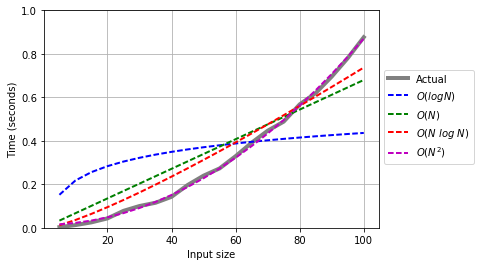

In [21]:
# Actual performance
actual_anagram1_x = sorted(performance_dict_anagram1.keys())
actual_anagram1_y = sorted(performance_dict_anagram1.values())

# Theoretical predictions if O(N)
theoretical_anagram1_x = anagram1_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram1_logN_params,anagram1_logN_covariance = curve_fit(logN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
anagram1_linearN_params,anagram1_linearN_covariance = curve_fit(linearN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
anagram1_NlogN_params,anagram1_NlogN_covariance = curve_fit(NlogN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
anagram1_N2_params,anagram1_N2_covariance = curve_fit(N2,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
#anagram1_twoN_params,anagram1_twoN_covariance = curve_fit(twoN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])
#anagram1_factN_params,anagram1_factN_covariance = curve_fit(factN,actual_anagram1_x,actual_anagram1_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram1_y_logN = [logN(num,anagram1_logN_params[0],anagram1_logN_params[1]) for num in theoretical_anagram1_x]
theoretical_anagram1_y_N = [linearN(num,anagram1_linearN_params[0],anagram1_linearN_params[1]) for num in theoretical_anagram1_x]
theoretical_anagram1_y_NlogN = [NlogN(num,anagram1_NlogN_params[0],anagram1_NlogN_params[1]) for num in theoretical_anagram1_x]
theoretical_anagram1_y_N2 = [N2(num,anagram1_N2_params[0],anagram1_N2_params[1]) for num in theoretical_anagram1_x]
#theoretical_anagram1_y_twoN = [twoN(num,anagram1_twoN_params[0],anagram1_twoN_params[1]) for num in theoretical_anagram1_x]
#theoretical_anagram1_y_factN = [factN(num,anagram1_factN_params[0],anagram1_factN_params[1]) for num in theoretical_anagram1_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
ax.set_ylim((1e-3,1))
ax.grid(True)

ax.plot(actual_anagram1_x,actual_anagram1_y,color='grey',lw=4,label='Actual')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_logN,color='b',lw=2,ls='--',label='$O(log N)$')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')
ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
#ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_twoN,color='k',lw=2,ls='--',label='$O(2^N)$')
#ax.plot(theoretical_anagram1_x,theoretical_anagram1_y_factN,color='y',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

This algorithm is pretty clearly in the $O(N^2)$ complexity class.

### Problem 0.2: Break `anagram1` apart
The function `anagram1` does a few important things. Let's take them one at a time.

Next, let's examine what the two while loops are doing with a more basic example with a single loop.

In [22]:
s1 = 'heart'
s2 = 'earth'

pos_s1 = 0
while pos_s1 < len(s1):
    print(s1[pos_s1])
    pos_s1 += 1

h
e
a
r
t


Extend this to having two loops. The first (outer) loop starts at the "h" in s1 and then iterates through all the letters in s2. Once it reaches the end of s2, it then goes to the next letter in s1 and iterates through all the letters in s2 again, etc. until it runs out of letters in s1 and stops.

You bat sense should be telling you that having a loop within a loop is a major efficiency bottleneck: you have to go through both lists before it's done. In this case 5 operations need to happen on s1 and for each operation in s1, 5 operations have to happen in s2. So $5*5 = 25$ operations need to happen in total. Because we're working with anagrams of the same size, s1 and s2 are both the same size so  $O(N) * O(N) = O(N^2)$, the third-worst performing complexity class we saw this week.

In [24]:
pos_s1 = 0
while pos_s1 < len(s1):
    pos_s2 = 0
    while pos_s2 < len(s2):
        print(s1[pos_s1], s2[pos_s2])
        pos_s2 += 1
    pos_s1 += 1

h e
h a
h r
h t
h h
e e
e a
e r
e t
e h
a e
a a
a r
a t
a h
r e
r a
r r
r t
r h
t e
t a
t r
t t
t h


The core functionality of the algorithm compares whether each letter in s1 also occurs in s2 *exactly as many times*. 

This code will check whether each letter occurs, but will double-count repeated characters. We've added if/else statements accessing a position in a string, which is $O(1)$, and evaluating whether a string is equal to another string, also $O(1)$. So far nothing we've added is worse than the two for loops' $O(N^2)$.

In [25]:
pos_s1 = 0
while pos_s1 < len(s1):
    pos_s2 = 0
    while pos_s2 < len(s2):
        if s1[pos_s1] == s2[pos_s2]:
            print(s1[pos_s1], s2[pos_s2], True)
        else:
            print(s1[pos_s1], s2[pos_s2], False)
        pos_s2 += 1
    pos_s1 += 1

h e False
h a False
h r False
h t False
h h True
e e True
e a False
e r False
e t False
e h False
a e False
a a True
a r False
a t False
a h False
r e False
r a False
r r True
r t False
r h False
t e False
t a False
t r False
t t True
t h False


Let's stop printing everything and build in some stronger checks with our while loops so we don't get ourselves in trouble.

In [26]:
pos_s1 = 0
is_anagram_s1 = True

while pos_s1 < len(s1)  and is_anagram_s1:
    pos_s2 = 0
    is_anagram_s2 = False
    while pos_s2 < len(s2) and not is_anagram_s2:
        if s1[pos_s1] == s2[pos_s2]:
            is_anagram_s2 = True
            print(s1[pos_s1], s2[pos_s2], True)
        else:
            pos_s2 += 1
    pos_s1 += 1

h h True
e e True
a a True
r r True
t t True


It works for "heart" and "string" which both have no duplicate letters. However, "off" is not an anagram of "foo" even though they have the same letters. The first "o" in "off" matches both of the "o"s in "foo" and each "f" in "off" matches the single "f" in "foo".

In [27]:
s3 = 'off'
s4 = 'foo'

pos_s3 = 0
is_anagram_s3 = True

while pos_s3 < len(s3)  and is_anagram_s3:
    pos_s4 = 0
    is_anagram_s4 = False
    while pos_s4 < len(s4) and not is_anagram_s4:
        if s3[pos_s3] == s4[pos_s4]:
            print(s3[pos_s3], s4[pos_s4], True)
            is_anagram_s4 = True
        else:
            print(s3[pos_s3],s4[pos_s4], False)
            pos_s4 += 1
    pos_s3 += 1

o f False
o o True
f f True
f f True


We need to come up with a way to "check off" a letter once we've established it is in the other string. We can create "a_list" of letters in s2 and mark off when we come across them so it's not counted a second time. This means that rather than looping through s2 itself as we've been doing, we need to loop through "a_list".

In [30]:
s3 = 'heart'
s4 = 'earth'

pos_s3 = 0
is_anagram_s3 = True

a_list = list(s4)

while pos_s3 < len(s3) and is_anagram_s3:
    pos_s4 = 0
    is_anagram_s4 = False
    while pos_s4 < len(a_list) and not is_anagram_s4:
        if s3[pos_s3] == a_list[pos_s4]:
            print(s3[pos_s3],a_list[pos_s4],'Found a match! Breaking inner loop!')
            is_anagram_s4 = True # If we match letter, stop the inner while loop 
        else: # If we haven't matched letters, keep on going
            print(s3[pos_s3],s4[pos_s4])
            pos_s4 += 1
            
    
    # With the inner while loop stopped, check off the letter in s4 so we don't double count it
    if is_anagram_s4:
        a_list[pos_s4] = None
        print('Checking off a letter!',a_list)
    else:
        is_anagram_s3 = False
        
    pos_s3 += 1
    
print("\n'{0}' and '{1}' are anagrams? {2}".format(s3,s4,is_anagram_s3))

h e
h a
h r
h t
h h Found a match! Breaking inner loop!
Checking off a letter! ['e', 'a', 'r', 't', None]
e e Found a match! Breaking inner loop!
Checking off a letter! [None, 'a', 'r', 't', None]
a e
a a Found a match! Breaking inner loop!
Checking off a letter! [None, None, 'r', 't', None]
r e
r a
r r Found a match! Breaking inner loop!
Checking off a letter! [None, None, None, 't', None]
t e
t a
t r
t t Found a match! Breaking inner loop!
Checking off a letter! [None, None, None, None, None]

'heart' and 'earth' are anagrams? True


The `anagram1` function was the hardest one by far to break apart to understand how it operates because of the combination of loops-within-loops, breaking a loop early, and the checking off procedure. The other three algorithms will be much easier to break apart.

### Problem 0.3: Identifying code causing time complexity

None of these steps involved anything more than comaprisons or variable assignment, which are $O(1)$, so nothing is a slower complexity class than the loop-within-a-loop from above which is $O(N^2)$. Despite all the extra stuff we had to do in terms of maintaining lists and checking when to break out of loops, none of that is worse than $O(N^2)$ so this algorithm should run in polynomial time.

In [31]:
s1 = make_a_random_word(10)
s2 = make_a_random_word(10)

comparison_list = list()

pos_s1 = 0
while pos_s1 < len(s1):
    pos_s2 = 0
    while pos_s2 < len(s2):
        comparison_list.append((s1[pos_s1],s2[pos_s2]))
        pos_s2 += 1
    pos_s1 += 1
    
len(comparison_list)

100

In [32]:
s1 = make_a_random_word(100)
s2 = make_a_random_word(100)

comparison_list = list()

pos_s1 = 0
while pos_s1 < len(s1):
    pos_s2 = 0
    while pos_s2 < len(s2):
        comparison_list.append((s1[pos_s1],s2[pos_s2]))
        pos_s2 += 1
    pos_s1 += 1
    
len(comparison_list)

10000

The number of comparisons that need to be made with this double loop grows $N^2$ with the number of inputs: put a 10-letter word in, and 100 comparisons need to be made. Put a 100-letter word in and 10000 comparisons need to be made. This is pretty clearly the bottleneck.

# Problem 1: $O(N\ log\ N)$ solution

Another strategy we could adopt is to sort the letters alphabetically and check if they're all there in both. This might save us from doing those loops. We'll use a specific sorting algorithm called `mergesort` that has $O(N\ log\ N)$ performance.

In [36]:
def anagram2(s1,s2):
    sorted_s1 = mergesort(list(s1))
    sorted_s2 = mergesort(list(s2))
    is_anagram = True
    
    for pos in range(len(s1)):
        
        if sorted_s1[pos] != sorted_s2[pos]:
            is_anagram = False
            break
            
    return is_anagram

In [37]:
# Test to make sure it works
print(anagram2('heart','earth')) # True
print(anagram2('boat','rock')) # False
print(anagram2('off','foo')) # False
print(anagram2('interrogatives','reinvestigator')) # True

True
False
False
True


### Problem 1.1: Identifying complexity class

Test the performance of the algorithm with different input sizes.

In [38]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram2 = {}

anagram2_word_sizes = [5,50,500,5000]

for word_size in anagram2_word_sizes:
    seconds = timeit.timeit(stmt='anagram2(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram2[word_size] = seconds
    
performance_dict_anagram2

{5: 0.003020074000232853,
 50: 0.10063167399857775,
 500: 1.7462164720018336,
 5000: 30.231073822000326}

Plot the observed performance from above against the best fits of different complexity classes.

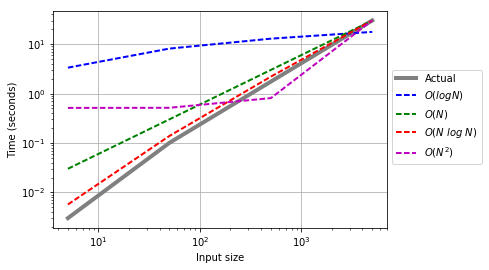

In [39]:
# Actual performance
actual_anagram2_x = sorted(performance_dict_anagram2.keys())
actual_anagram2_y = sorted(performance_dict_anagram2.values())

# Theoretical predictions if O(N)
theoretical_anagram2_x = anagram2_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram2_logN_params,anagram2_logN_covariance = curve_fit(logN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
anagram2_linearN_params,anagram2_linearN_covariance = curve_fit(linearN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
anagram2_NlogN_params,anagram2_NlogN_covariance = curve_fit(NlogN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
anagram2_N2_params,anagram2_N2_covariance = curve_fit(N2,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
#anagram2_twoN_params,anagram2_twoN_covariance = curve_fit(twoN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])
#anagram2_factN_params,anagram2_factN_covariance = curve_fit(factN,actual_anagram2_x,actual_anagram2_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram2_y_logN = [logN(num,anagram2_logN_params[0],anagram2_logN_params[1]) for num in theoretical_anagram2_x]
theoretical_anagram2_y_N = [linearN(num,anagram2_linearN_params[0],anagram2_linearN_params[1]) for num in theoretical_anagram2_x]
theoretical_anagram2_y_NlogN = [NlogN(num,anagram2_NlogN_params[0],anagram2_NlogN_params[1]) for num in theoretical_anagram2_x]
theoretical_anagram2_y_N2 = [N2(num,anagram2_N2_params[0],anagram2_N2_params[1]) for num in theoretical_anagram2_x]
#theoretical_anagram2_y_twoN = [twoN(num,anagram2_twoN_params[0],anagram2_twoN_params[1]) for num in theoretical_anagram2_x]
#theoretical_anagram2_y_factN = [factN(num,anagram2_factN_params[0],anagram2_factN_params[1]) for num in theoretical_anagram2_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
#ax.set_ylim((1e-3,.2))
ax.grid(True)

ax.plot(actual_anagram2_x,actual_anagram2_y,color='grey',lw=4,label='Actual')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_logN,color='b',lw=2,ls='--',label='$O(log N)$')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')
ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
#ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_twoN,color='k',lw=2,ls='--',label='$O(2^N)$')
#ax.plot(theoretical_anagram2_x,theoretical_anagram2_y_factN,color='y',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

What complexity class best fits the Actual data?

### Problem 1.2: Break `anagram2` apart

Here's the `anagram2` function from above.

What do the lines with `mergesort` return?

What happens in terms of performance when mergesort sorts a `make_a_random_word` of length 100? 1000?

What does the loop do?

What does the if statement within the loop do?

What happens if you remove the `break`? Comparing the complexity classes of different operations in this algorithm, does the break actually save us time for large inputs compared to other operations?

Why is "is_anagram" returned versus something else? How is this variable modified throughout the run of the algorithm?

Having broken it apart, copy the definition of `anagram2` below and include line-by-line comments for what each line is doing.

### Problem 1.3: Identifying code causing time complexity

Based on the functionality of each line above, experiment with passing different sized inputs (ideally an order of magnitude larger -- use the `make_a_random_word` function). Which part of the algorithm slows down the most when you give it a much larger input? Does this make sense in terms of the Actual performance we observed?

Alternatively, follow a process of elimination: what parts of the algorithm are you confident run in $O(N)$, $O(log\ N)$, or $O(1)$? If these parts of the code run faster than $O(N\ log\ N)$ but we know from Problem 1.1 that $O(N\ log\ N)$ is the best fit to the algorithm's run time, then what must be causing the $O(N\ log\ N)$ performance?

# Problem 2: $O(N!)$ solution

Define the `anagram3` function.

In [40]:
def anagram3(s1,s2):
    is_anagram = False
    for permutation in permutations(s1,len(s1)):
        
        stringified = ''.join(permutation)
        if stringified == s2:
            is_anagram = True
            
    return is_anagram

Test to make sure it works.

In [41]:
print(anagram3('heart','earth')) # True
print(anagram3('boat','rock')) # False
print(anagram3('off','foo')) # False
#print(anagram2('interrogatives','reinvestigator')) # True, but don't try it

True
False
False


### Problem 2.1: Identifying complexity class

Test the performance of the algorithm with different input sizes.

In [42]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram3 = {}

anagram3_word_sizes = range(2,10)

for word_size in anagram3_word_sizes:
    seconds = timeit.timeit(stmt='anagram3(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram3[word_size] = seconds
    
performance_dict_anagram3

{2: 0.0010860679976758547,
 3: 0.0018506170017644763,
 4: 0.005883470999833662,
 5: 0.03043241399791441,
 6: 0.1756098949990701,
 7: 1.2070606900015264,
 8: 10.124981128999934,
 9: 93.70525439099947}

Plot the observed performance from above against the best fits of different complexity classes.

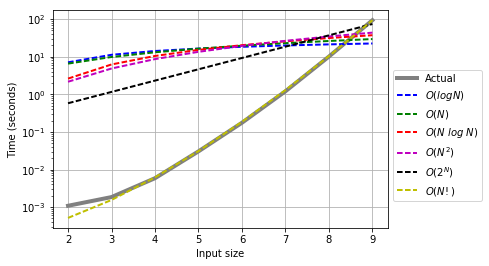

In [44]:
# Actual performance
actual_anagram3_x = sorted(performance_dict_anagram3.keys())
actual_anagram3_y = sorted(performance_dict_anagram3.values())

# Theoretical predictions if O(N)
theoretical_anagram3_x = anagram3_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram3_logN_params,anagram3_logN_covariance = curve_fit(logN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_linearN_params,anagram3_linearN_covariance = curve_fit(linearN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_NlogN_params,anagram3_NlogN_covariance = curve_fit(NlogN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_N2_params,anagram3_N2_covariance = curve_fit(N2,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_twoN_params,anagram3_twoN_covariance = curve_fit(twoN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])
anagram3_factN_params,anagram3_factN_covariance = curve_fit(factN,actual_anagram3_x,actual_anagram3_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram3_y_logN = [logN(num,anagram3_logN_params[0],anagram3_logN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_N = [linearN(num,anagram3_linearN_params[0],anagram3_linearN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_NlogN = [NlogN(num,anagram3_NlogN_params[0],anagram3_NlogN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_N2 = [N2(num,anagram3_N2_params[0],anagram3_N2_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_twoN = [twoN(num,anagram3_twoN_params[0],anagram3_twoN_params[1]) for num in theoretical_anagram3_x]
theoretical_anagram3_y_factN = [factN(num,anagram3_factN_params[0],anagram3_factN_params[1]) for num in theoretical_anagram3_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
#ax.set_ylim((1e-3,.2))
ax.grid(True)

ax.plot(actual_anagram3_x,actual_anagram3_y,color='grey',lw=4,label='Actual')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_logN,color='b',lw=2,ls='--',label='$O(log N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_twoN,color='k',lw=2,ls='--',label='$O(2^N)$')
ax.plot(theoretical_anagram3_x,theoretical_anagram3_y_factN,color='y',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

What complexity class best fits the Actual data?

### Problem 2.2: Break `anagram3` apart

Here's the `anagram3` function from above.

What does `permutations(s1,len(s1))` do?

What does the for loop do?

What is being stored as "stringified" versus the permutation?

What is the `if` statement checking?

Why is "is_anagram" returned versus something else? How is this variable modified throughout the run of the algorithm?

Having broken it apart, copy the definition of `anagram3` below and include line-by-line comments for what each line is doing.

### Problem 2.3: Identifying code causing time complexity

Based on the functionality of each line above, experiment with passing different sized inputs (use the `make_a_random_word` function **but do not give it a size greater than 10 unless you want your grandchildren to be waiting on the results**). Which part of the algorithm slows down the most or has to do many more operations when you give it a much larger input? Does this make sense in terms of the Actual performance we observed?

# Problem 3: $O(N)$ solution

In [45]:
def anagram4(s1,s2):
    code_s1 = dict(zip(string.ascii_lowercase,[0]*26))
    code_s2 = dict(zip(string.ascii_lowercase,[0]*26))
    
    for s1_letter in s1:
        code_s1[s1_letter] += 1
    
    for s2_letter in s2:
        code_s2[s2_letter] += 1
    
    if code_s1 == code_s2:
        return True
    else:
        return False

### Problem 3.1: Identifying complexity class

In [46]:
# Create a dictionary to store the performance numbers values for different inputs ranges as key
performance_dict_anagram4 = {}

anagram4_word_sizes = [5,10,100,1000,10000,100000]

for word_size in anagram4_word_sizes:
    seconds = timeit.timeit(stmt='anagram4(random_word,shuffled_word)',
                            setup='random_word = make_a_random_word({0});shuffled_word = shuffle_a_word(random_word)'.format(word_size),
                            number=1000,
                            globals=globals())
    
    # Record the performance in the dictionary
    performance_dict_anagram4[word_size] = seconds
    
performance_dict_anagram4

{5: 0.00835653199828812,
 10: 0.009956228997907601,
 100: 0.022735291000572033,
 1000: 0.16211122199820238,
 10000: 1.5444257459967048,
 100000: 17.13818444500066}

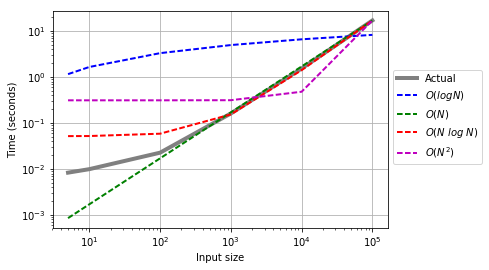

In [49]:
# Actual performance
actual_anagram4_x = sorted(performance_dict_anagram4.keys())
actual_anagram4_y = sorted(performance_dict_anagram4.values())

# Theoretical predictions if O(N)
theoretical_anagram4_x = anagram4_word_sizes

# Perform curve-fitting assuming both a linear and a polynomial function
anagram4_logN_params,anagram4_logN_covariance = curve_fit(logN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
anagram4_linearN_params,anagram4_linearN_covariance = curve_fit(linearN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
anagram4_NlogN_params,anagram4_NlogN_covariance = curve_fit(NlogN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
anagram4_N2_params,anagram4_N2_covariance = curve_fit(N2,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
#anagram4_twoN_params,anagram4_twoN_covariance = curve_fit(twoN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])
#anagram4_factN_params,anagram4_factN_covariance = curve_fit(factN,actual_anagram4_x,actual_anagram4_y,bounds=[0,[np.inf,np.inf]])

# Make different theoretical y-value predictions using parameters from curve-fitting
theoretical_anagram4_y_logN = [logN(num,anagram4_logN_params[0],anagram4_logN_params[1]) for num in theoretical_anagram4_x]
theoretical_anagram4_y_N = [linearN(num,anagram4_linearN_params[0],anagram4_linearN_params[1]) for num in theoretical_anagram4_x]
theoretical_anagram4_y_NlogN = [NlogN(num,anagram4_NlogN_params[0],anagram4_NlogN_params[1]) for num in theoretical_anagram4_x]
theoretical_anagram4_y_N2 = [N2(num,anagram4_N2_params[0],anagram4_N2_params[1]) for num in theoretical_anagram4_x]
#theoretical_anagram4_y_twoN = [twoN(num,anagram4_twoN_params[0],anagram4_twoN_params[1]) for num in theoretical_anagram4_x]
#theoretical_anagram4_y_factN = [factN(num,anagram4_factN_params[0],anagram4_factN_params[1]) for num in theoretical_anagram4_x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (seconds)')
#ax.set_ylim((1e-3,.2))
ax.grid(True)

ax.plot(actual_anagram4_x,actual_anagram4_y,color='grey',lw=4,label='Actual')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_logN,color='b',lw=2,ls='--',label='$O(log N)$')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_N,color='g',lw=2,ls='--',label='$O(N)$')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_NlogN,color='r',lw=2,ls='--',label='$O(N\ log\ N)$')
ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_N2,color='m',lw=2,ls='--',label='$O(N^2)$')
#ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_twoN,color='k',lw=2,ls='--',label='$O(2^N)$')
#ax.plot(theoretical_anagram4_x,theoretical_anagram4_y_factN,color='y',lw=2,ls='--',label='$O(N!)$')

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

What complexity class best fits the Actual data?

### Problem 3.2: Break `anagram4` apart

Here's the `anagram4` function from above.

What does `dict(zip(string.ascii_lowercase,[0]*26))` do?

What does each for loop do?

What does the `if` statement check?

There's no "is_anagram" variable here. Does it matter in terms of complexity or readability?

Having broken it apart, copy the definition of `anagram4` below and include line-by-line comments for what each line is doing.

### Problem 3.3: Identifying code causing time complexity

Based on the functionality of each line above, experiment with passing different sized inputs (use the `make_a_random_word` function). Which part of the algorithm slows down the most or has to do many more operations when you give it a much larger input? Does this make sense in terms of why we see the Actual performance we observed?